In [1]:
import pandas as pd
import numpy as np

In [2]:
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

In [3]:
df = pd.read_csv('merged_all_2F.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,time,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Outside Air Temp,Humidity,Zone Temperature Next,Actual Supply Flow Next,Outside Air Temp Next,Humidity Next,energy Next
0,0,0,0,2018-01-03T20:57:39+00:00,72.5,330.0,75.2,318.73,10.109642,68.44,56.0,75.2,317.06,68.50,56.0,10.113301
1,1,1,1,2018-01-03T21:04:13+00:00,72.5,330.0,75.2,317.06,10.113301,68.50,56.0,75.7,314.34,68.25,56.0,10.099466
2,2,2,2,2018-01-03T21:10:44+00:00,72.5,330.0,75.7,314.34,10.099466,68.25,56.0,75.7,313.91,68.31,56.0,10.241028
3,3,3,3,2018-01-03T21:17:16+00:00,72.5,330.0,75.7,313.91,10.241028,68.31,56.0,75.7,318.31,68.44,57.0,10.187620
4,4,4,4,2018-01-03T21:23:44+00:00,72.5,330.0,75.7,318.31,10.187620,68.44,57.0,75.7,316.65,68.81,57.0,10.194055


In [4]:
def temp_conversion(val):
    return (val - 32) * 5/9 + 273.15

df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df['Outside Air Temp'] = temp_conversion(df['Outside Air Temp'])
df['Zone Temperature'] = temp_conversion(df['Zone Temperature'])

#datestuff
df['year'] = df['time'].dt.year
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['minute'] = df['time'].dt.minute

In [5]:
# Separate Target Variable and Predictor Variables
TargetVariable=['energy']
Predictors=['Common Setpoint','Actual Sup Flow SP','Zone Temperature', 'Actual Supply Flow','energy','Humidity', 'Outside Air Temp', 'year','day','hour','month','minute']
 
X = df[Predictors].values
y = df[TargetVariable].values

In [6]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(182171, 12)
(182171, 1)
(78074, 12)
(78074, 1)


In [10]:
pip install tensorflow==2.10

Defaulting to user installation because normal site-packages is not writeable
     |██████████████████              | 323.7 MB 151.9 MB/s eta 0:00:02████▎                           | 78.0 MB 71.9 MB/s eta 0:00:07 |████▋                           | 83.4 MB 71.9 MB/s eta 0:00:07         | 94.8 MB 71.9 MB/s eta 0:00:07        | 254.4 MB 67.0 MB/s eta 0:00:05�█████████▌                 | 261.9 MB 67.0 MB/s eta 0:00:05 MB/s eta 0:00:02| 288.8 MB 151.9 MB/s eta 0:00:02��██████▍               | 295.8 MB 151.9 MB/s eta 0:00:02| 302.2 MB 151.9 MB/s eta 0:00:02[K     |█████████████████▊              | 319.7 MB 151.9 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 578.1 MB 144.9 MB/s eta 0:00:01     |████████████████████████████████| 578.1 MB 40 kB/s 
     |████████████████████████████████| 438 kB 29.0 MB/s eta 0:00:01
  Using cached numpy-1.24.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     |████████████████████████████████| 1.7 MB 21.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 33.5 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 16] Device or resource busy: '.nfs00000000003254be00000b41'

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install keras==2.10

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.10.0 which is incompatible.
tensorflow-gpu 2.6.0 requires absl-py~=0.10, but you have absl-py 1.4.0 which is incompatible.
tensorflow-gpu 2.6.0 requires flatbuffers~=1.12.0, but you have flatbuffers 23.1.21 which is incompatible.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.24.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

2023-02-04 18:01:52.705937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 18:01:52.861701: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-04 18:01:52.866011: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-04 18:01:52.866028: I tensorf

In [10]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=12, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
9109/9109 [==============================] - 15s 2ms/step - loss: 0.0198
Epoch 2/50
9109/9109 [==============================] - 15s 2ms/step - loss: 7.4300e-05
Epoch 3/50
9109/9109 [==============================] - 16s 2ms/step - loss: 5.4302e-05
Epoch 4/50
9109/9109 [==============================] - 14s 2ms/step - loss: 4.4017e-05
Epoch 5/50
9109/9109 [==============================] - 12s 1ms/step - loss: 3.5898e-05
Epoch 6/50
9109/9109 [==============================] - 11s 1ms/step - loss: 3.1569e-05
Epoch 7/50
9109/9109 [==============================] - 15s 2ms/step - loss: 2.7868e-05
Epoch 8/50
9109/9109 [==============================] - 11s 1ms/step - loss: 2.7248e-05
Epoch 9/50
9109/9109 [==============================] - 9s 1ms/step - loss: 2.6745e-05
Epoch 10/50
9109/9109 [==============================] - 9s 1ms/step - loss: 2.4278e-05
Epoch 11/50
9109/9109 [==============================] - 13s 1ms/step - loss: 2.3688e-05
Epoch 12/50
9109/9109 [=============

In [11]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

2440/2440 [==============================] - 2s 720us/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 100.47895757567143


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 712us/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 108.63895438537241


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 750us/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 100.09274850362843


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 748us/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 100.41027079243909


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 768us/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 104.29429781084647


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 728us/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 108.1994087013669


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 755us/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 102.25383909677979


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 726us/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 107.27224626798748


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 779us/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 100.87721639755972


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 768us/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 103.32800095457603


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 771us/step
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 101.22283116617739


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 707us/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 116.08966116718852


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 712us/step
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 100.16494915307048


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 778us/step
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 100.23167773599539


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2440/2440 [==============================] - 2s 739us/step
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 101.8254297909663


/tmp/ipykernel_959/2567899739.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<AxesSubplot:xlabel='Parameters'>

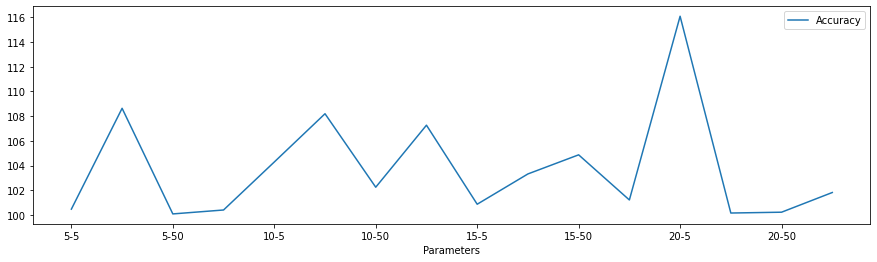

In [12]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)


%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [13]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Energy']=y_test_orig
TestingData['PredictedEnergy']=Predictions
TestingData.head()

2440/2440 [==============================] - 2s 907us/step


,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Humidity,Outside Air Temp,year,day,hour,month,minute,Energy,PredictedEnergy
0,72.0,0.0,297.894444,36.16,1.397544,61.0,292.944444,2017.0,14.0,7.0,8.0,39.0,1.397544,1.298126
1,72.5,415.0,294.733333,428.21,12.222647,41.0,286.344444,2018.0,19.0,16.0,2.0,16.0,12.222647,12.152685
2,72.0,0.0,296.866667,0.00,0.529948,50.0,294.055556,2018.0,13.0,17.0,1.0,47.0,0.529948,0.401178
3,72.0,0.0,296.555556,31.89,1.272985,50.0,284.033333,2017.0,21.0,12.0,12.0,57.0,1.272985,1.183125
4,72.0,0.0,297.316667,26.95,0.786537,37.0,290.388889,2018.0,27.0,23.0,1.0,30.0,0.786537,0.609065


In [14]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Energy']-TestingData['PredictedEnergy'])/TestingData['Energy'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: -inf


,Common Setpoint,Actual Sup Flow SP,Zone Temperature,Actual Supply Flow,energy,Humidity,Outside Air Temp,year,day,hour,month,minute,Energy,PredictedEnergy,APE
0,72.0,0.0,297.894444,36.16,1.397544,61.0,292.944444,2017.0,14.0,7.0,8.0,39.0,1.397544,1.298126,7.113779
1,72.5,415.0,294.733333,428.21,12.222647,41.0,286.344444,2018.0,19.0,16.0,2.0,16.0,12.222647,12.152685,0.572396
2,72.0,0.0,296.866667,0.00,0.529948,50.0,294.055556,2018.0,13.0,17.0,1.0,47.0,0.529948,0.401178,24.298667
3,72.0,0.0,296.555556,31.89,1.272985,50.0,284.033333,2017.0,21.0,12.0,12.0,57.0,1.272985,1.183125,7.059013
4,72.0,0.0,297.316667,26.95,0.786537,37.0,290.388889,2018.0,27.0,23.0,1.0,30.0,0.786537,0.609065,22.563759
